In [0]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#System
import os

In [0]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


<a class="anchor" id="2."></a>**Olivetti Dataset** 

Brief information about Olivetti Dataset:

* Face images taken between April 1992 and April 1994.
* There are ten different image of each of 40 distinct people
* There are 400 face images in the dataset
* Face images were taken at different times, variying ligthing, facial express and facial detail
* All face images have black background
* The images are gray level
* Size of each image is 64x64
* Image pixel values were scaled to [0, 1] interval
* Names of 40 people were encoded to an integer from 0 to 39


In [0]:
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

rng = RandomState(0)
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)


In [0]:
data = dataset.data
target = dataset.target

Let's verify above information

In [0]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0:4]))
data = data.reshape(400, 64, 64)

There are 400 images in the dataset
There are 40 unique targets in the dataset
Pixel values were scaled to [0,1] interval. e.g:[0.6694215 0.6363636 0.6487603 0.6859504]


In [0]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


**Show 48 Disticnt People in the Olivetti Dataset** 

In [0]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

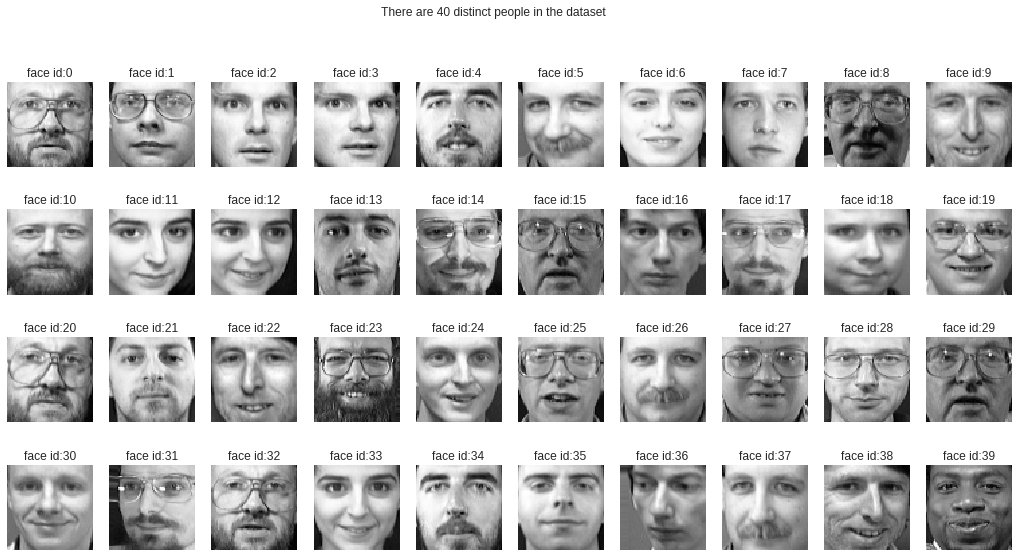

In [0]:
show_40_distinct_people(data, np.unique(target))

**Show 10 Face Images of Selected Target** 

In [0]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

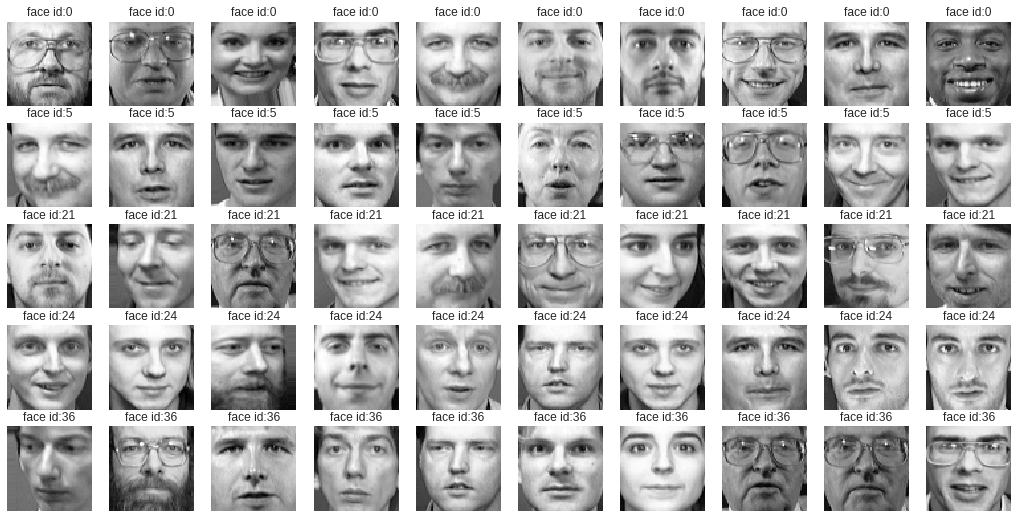

In [0]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

**Machine Learning Model fo Face Recognition**

Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

In [0]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


<a class="anchor" id="3.1."></a>**Split data and target into Random train and test Subsets** 

The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 30 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 7 training images and 3 test images for each subject. You can play with training and test rates.

In [0]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


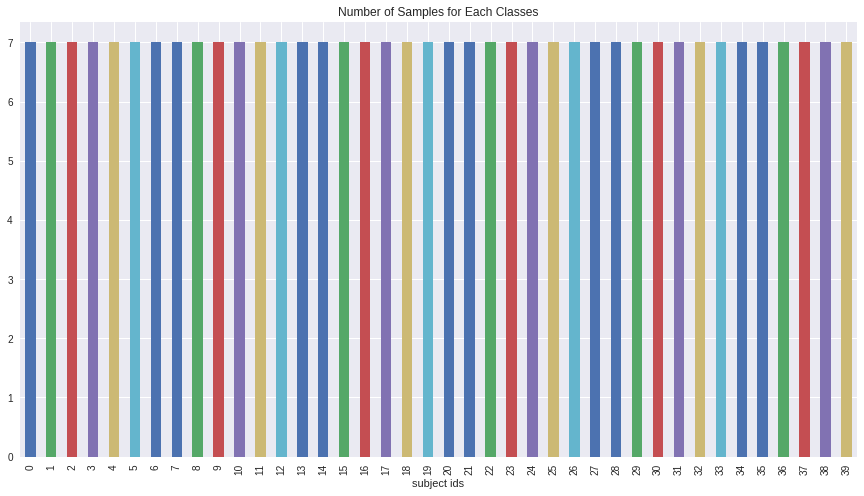

In [0]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

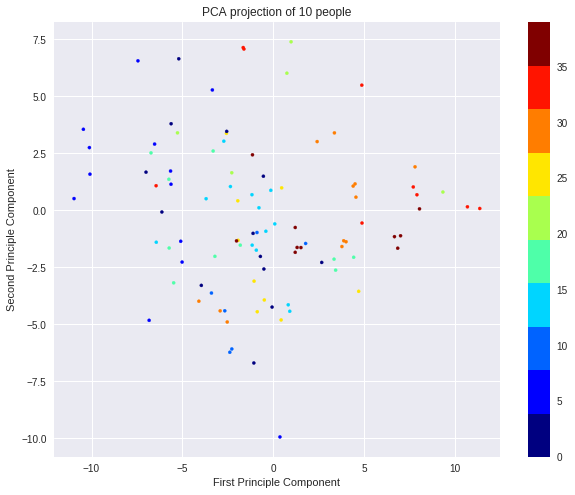

In [0]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

In [0]:
n_components=90
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)


<a class="anchor" id="3.6."></a>**Classification Results**  

In [0]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [0]:
clf = LogisticRegression()
# Enter code here to fit the model
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.98


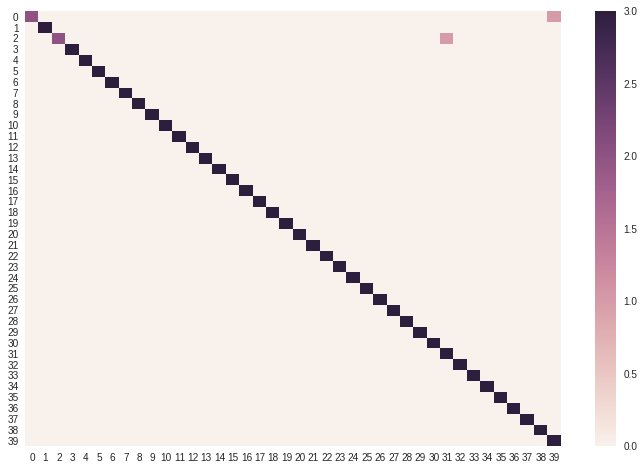

In [0]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [0]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

## Supervised Metric Learning
Now we will try metric learning, We are taking the 90 components so that the training is fast. You can take the original 4096(64\*64) dimensions.

In [0]:
pca=PCA(n_components=90)
pca.fit(X)
X_pca=pca.transform(X)

We store the data indices of different training points.

In [0]:
indices = {}
for i in range(40): # There are 40 people
  indices[i] = []
for i in range(len(target)):
  indices[target[i]].append(i)

In [0]:
indices[0] # For person 1

[42, 43, 62, 67, 70, 93, 194, 265, 299, 391]

In [0]:
# Let us create positive and negative pairs
import random

tr_pairs = 10000 # Number of training pairs we want
pairs = []
for i in range(tr_pairs):
  first = random.randint(0, 39)
  if i % 2 == 0:
    positive_ind1 = random.choice(indices[first])
    positive_ind2 = random.choice(indices[first])
    pairs.append([positive_ind1, positive_ind2, 1])
  else:
    positive_ind1 = random.choice(indices[first])
    second = random.randint(0, 39)
    negative_ind2 = random.choice(indices[second])
    pairs.append([#Add code here, -1])

In [0]:
pairs[0], pairs[1]

([360, 160, 1], [33, 242, -1])

In [0]:
import numpy as np
def ML(tr_pairs, descr, max_iters):
      low_dim = 64
      L = np.random.rand(descr.shape[1], low_dim) # This will transform our data points to a smaller dimension
      L = L/np.sqrt(np.sum(L**2))
      lr = 0.001
      counter = 0
      failed  = 0
      for itrs in range(max_iters):
          itr = itrs%len(tr_pairs)
          item = tr_pairs[itr]
          i, j, y_ij = item
          x_i = descr[i] # the features of first image
          x_j = descr[j] # the features of second image
          d_ij = np.sqrt(np.sum((np.dot(x_i, L) - np.dot(x_j, L))**2)) # Distance between these two images after projecting
          diff = x_i - x_j
          if (itr <= 1):
            print ("Class: ",y_ij," Distance: ", d_ij) # Note the distance for class 1 should be small while high for class: -1
          if (d_ij > 0.3) and y_ij == 1: # For positive class we want the distance to be small, if it is big that means we are failing
              failed += 1
              L = L - lr* (y_ij * np.outer(diff, np.dot(diff, L)) + 0.0000000*L) # SGD
          if (d_ij < 0.7) and y_ij == -1: # For negative class we want the distance to be big, if it is small that means we are failing
              failed += 1
              # Enter the code for SGD here
          counter +=1
          if counter%1000==0:
              print ("loss:", float(failed)/float(counter))
              print ("|L|", np.sum(L))
              failed = 0
              counter = 0
      return L


In [0]:
L = ML(pairs, X_pca, 200000)

Class:  1  Distance:  1.0699339786734747
Class:  -1  Distance:  0.8219261952347634
loss: 0.516
|L| 55.6849167812159
loss: 0.455
|L| 50.61165801805102
loss: 0.431
|L| 45.311468180581336
loss: 0.414
|L| 40.681936836792076
loss: 0.392
|L| 37.56198467430584
loss: 0.373
|L| 34.96801614334598
loss: 0.365
|L| 32.38422145029119
loss: 0.356
|L| 30.496816094513598
loss: 0.3
|L| 28.966255501699226
loss: 0.297
|L| 27.45593279494487
Class:  1  Distance:  0.3440076619778397
Class:  -1  Distance:  0.5954569963736527
loss: 0.3
|L| 26.003046837299028
loss: 0.254
|L| 25.27599237863306
loss: 0.256
|L| 24.190573685897085
loss: 0.251
|L| 22.973078695489384
loss: 0.269
|L| 21.95342858231258
loss: 0.239
|L| 21.400341130413437
loss: 0.245
|L| 20.792215353511192
loss: 0.246
|L| 20.254622703966753
loss: 0.209
|L| 19.73057028813732
loss: 0.234
|L| 19.207146015249265
Class:  1  Distance:  0.31953608512884896
Class:  -1  Distance:  0.6723946929286918
loss: 0.223
|L| 18.662856802240874
loss: 0.209
|L| 18.3762220641

In [0]:
X_new = #Some operation here(X_pca, L) # Let's project X_pca by taking ___ product with L

In [0]:
pca=PCA(n_components=2)
pca.fit(X_new)
X_new=pca.transform(X_new)

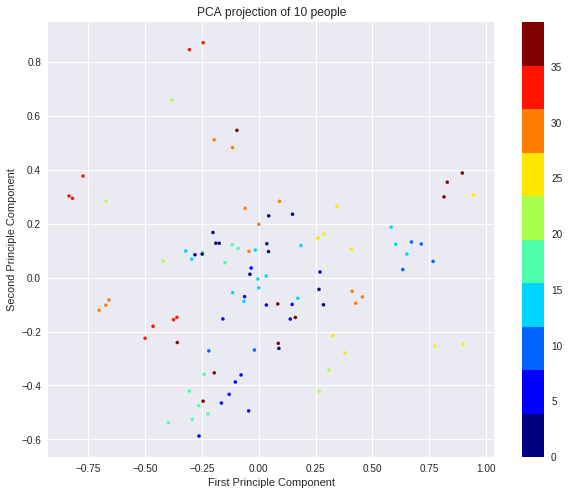

In [0]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_new[:index_range,0],
            X_new[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

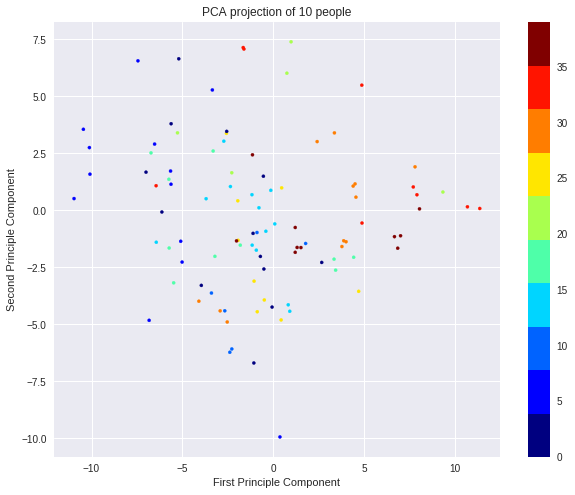

In [0]:
pca=PCA(n_components=2)
pca.fit(X_pca)
X_pca=pca.transform(X_pca)
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)